# 任务介绍 

本任务对电商网店的销售数据进行数据清洗、数据可视化、数据分析，阐述销售现状、挖掘潜在规律、发现存在问题、提出可行性建议。 

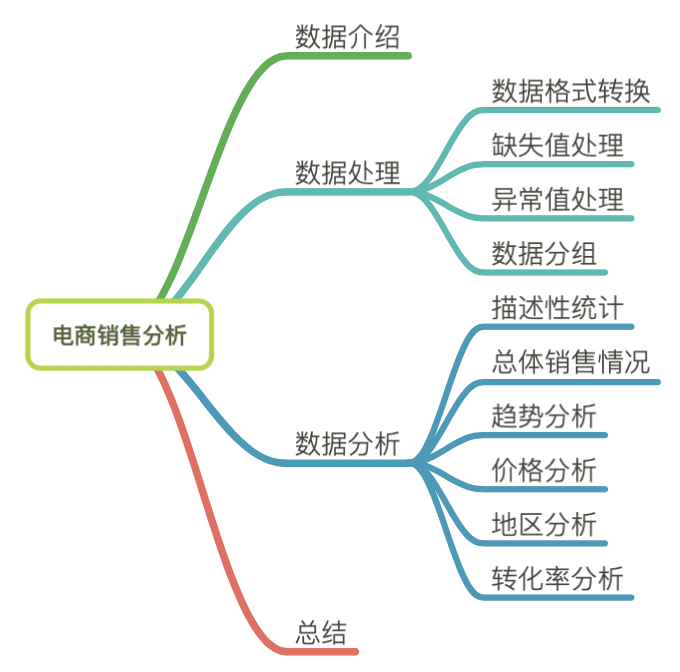

In [1]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 查看数据
data=pd.read_csv('./order_data.csv')
data.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaN,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8


# 数据描述 
订单表为淘宝电商平台2020年2月份的共28010条订单数据。 

数据字段如下：

订单编号：共28010条 

总金额：该笔订单的总金额 

买家实际支付金额：实际成交金额。分为已付款和未付款两种情况：已付款：买家实际支付金额 = 总金额 - 退款金额，未付款：买家实际支付金额 = 0 

收货地址：维度为省份,共包含31个省市 

订单创建时间：2020年2月1日 至 2020年2月29日 

订单付款时间：2020年2月1日 至 2020年3月1日 

退款金额：付款后申请退款的金额。没有申请退款或没有付过款，退款金额为0

In [3]:
# 数据基本情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      28010 non-null  int64  
 1   总金额       28010 non-null  float64
 2   买家实际支付金额  28010 non-null  float64
 3   收货地址      28010 non-null  object 
 4   订单创建时间    28010 non-null  object 
 5   订单付款时间    24087 non-null  object 
 6   退款金额      28010 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ MB


付款时间存在缺失值

In [4]:
1-(24087/28010)

0.14005712245626567

In [5]:
sum(data['订单付款时间 '].isnull())/data.shape[0]

0.14005712245626561

# 数据预处理

In [6]:
data.columns

Index(['订单编号', '总金额', '买家实际支付金额', '收货地址 ', '订单创建时间', '订单付款时间 ', '退款金额'], dtype='object')

In [7]:
# 修改字段名称，规范数据
data.rename(columns={'收货地址 ':'收货地址','订单付款时间 ':'订单付款时间'},inplace=True)
data.columns

Index(['订单编号', '总金额', '买家实际支付金额', '收货地址', '订单创建时间', '订单付款时间', '退款金额'], dtype='object')

In [8]:
# 修改日期时间的数据类型，方便后期分析
data['订单创建时间']=pd.to_datetime(data['订单创建时间'])
data['订单付款时间']=pd.to_datetime(data['订单付款时间'])

# 数据分析
描述性统计

In [9]:
# 字段描述
data.describe()

,订单编号,总金额,买家实际支付金额,退款金额
count,28010.000000,28010.000000,28010.000000,28010.000000
mean,14005.500000,106.953253,67.921712,20.433271
std,8085.934856,1136.587094,151.493434,71.501963
min,1.000000,1.000000,0.000000,0.000000
25%,7003.250000,38.000000,0.000000,0.000000
50%,14005.500000,75.000000,45.000000,0.000000
75%,21007.750000,119.000000,101.000000,0.000000
max,28010.000000,188320.000000,16065.000000,3800.000000


异常值处理

总金额的最大值远高于75%分位数，进行异常值检测

In [10]:
#plt.rcParams['font.sans-serif'] = 'WenQuanYi Zen Hei'
#plt.rcParams['axes.unicode_minus'] = False
#设置字体 Windows
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来显示中文
plt.rcParams["axes.unicode_minus"] = False  # 用来显示负号
#忽略警告
import warnings
warnings.filterwarnings('ignore')

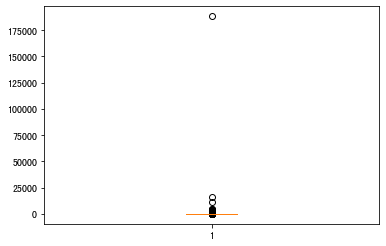

In [11]:
plt.boxplot(data['总金额'])
plt.show()

由图可知，总金额最大值远离其他数值，>175000

In [12]:
data[data['总金额']>175000]

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
19257,19258,188320.0,0.0,上海,2020-02-24 19:35:06,NaT,0.0


异常值只有一条，并且没有付款，可以删除

In [13]:
data=data.drop(index=data[data['总金额']>175000].index)
data.shape

(28009, 7)

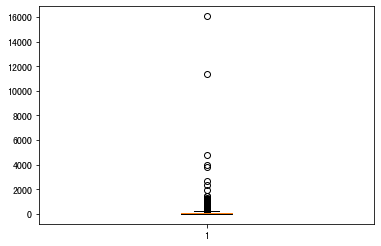

In [14]:
plt.boxplot(data['买家实际支付金额'])
plt.show()

In [15]:
data[data['买家实际支付金额']>6000]

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
3143,3144,11400.0,11400.0,江苏省,2020-02-18 09:34:43,2020-02-18 09:34:53,0.0
13511,13512,16065.0,16065.0,内蒙古自治区,2020-02-26 15:41:27,2020-02-26 15:42:24,0.0


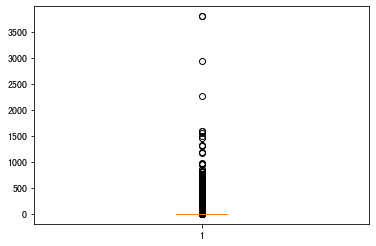

In [16]:
plt.boxplot(data['退款金额'])
plt.show()

In [17]:
data[data['退款金额']>2000]

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
3841,3842,3800.0,0.0,广东省,2020-02-09 23:50:33,2020-02-10 00:52:40,3800.0
5764,5765,3800.0,0.0,河南省,2020-02-02 16:52:17,2020-02-02 16:52:22,3800.0
10163,10164,2930.2,0.0,山东省,2020-02-22 01:59:50,2020-02-22 01:59:52,2930.2
24941,24942,2260.0,0.0,安徽省,2020-02-28 09:52:32,2020-02-28 09:52:43,2260.0


In [18]:
data.describe()

,订单编号,总金额,买家实际支付金额,退款金额
count,28009.000000,28009.000000,28009.000000,28009.000000
mean,14005.312471,100.233518,67.924137,20.434000
std,8086.018294,164.451538,151.495595,71.503135
min,1.000000,1.000000,0.000000,0.000000
25%,7003.000000,38.000000,0.000000,0.000000
50%,14005.000000,75.000000,45.000000,0.000000
75%,21008.000000,119.000000,101.000000,0.000000
max,28010.000000,16065.000000,16065.000000,3800.000000


In [19]:
data_desc=data.copy()
data_desc['退款金额']=data_desc['退款金额'].replace(0,np.nan)
data_desc['买家实际支付金额']=np.where(data_desc['订单付款时间'].isnull(),np.nan,data_desc['买家实际支付金额'])

In [20]:
data_desc.describe()

,订单编号,总金额,买家实际支付金额,退款金额
count,28009.000000,28009.000000,24087.000000,5646.000000
mean,14005.312471,100.233518,78.983981,101.370159
std,8086.018294,164.451538,160.668911,130.999959
min,1.000000,1.000000,0.000000,1.000000
25%,7003.000000,38.000000,31.850000,38.000000
50%,14005.000000,75.000000,59.000000,76.000000
75%,21008.000000,119.000000,112.000000,119.000000
max,28010.000000,16065.000000,16065.000000,3800.000000


数据分布：

* 订单情况
 * 共记录28009条订单，其中买家实际支付订单24087条(86.0%)，买家有退款行为的订单5646条(占实际支付23.4%）；
* 订单总金额
 * 平均每单订单100.2元，金额最小1元，金额最大16065元；
* 实际支付金额
 * 实际支付订单平均每单79.0元，金额最小0元，金额最大16065元；
* 退款金额
 * 退款订单平均每单退款101.4元，金额最小1元，金额最大3800元。

## 总体销售情况

In [21]:
np.sum(data['买家实际支付金额'])

1902487.15

In [22]:
data.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8


In [23]:
data['创建时间']=data['订单创建时间'].dt.strftime('%m月%d日') # dt.strftime()时间的格式化，是series的方法
data['付款时间']=data['订单付款时间'].dt.strftime('%m月%d日')
data.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,02月21日,NaN
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,02月20日,02月21日
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0,02月20日,NaN
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,02月20日,02月20日
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,02月20日,02月20日


In [24]:
GMV_day=data[data['付款时间']!='NaN'].groupby('付款时间').sum()
order_day=data[data['付款时间']!='NaN'].groupby('付款时间').count()

In [25]:
#设置字体 MAC
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False
#设置字体 Windows
#plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来显示中文
#plt.rcParams["axes.unicode_minus"] = False  # 用来显示负号

In [26]:
GMV_day

,订单编号,总金额,买家实际支付金额,退款金额
付款时间,,,,
02月01日,973922,14545.00,7031.00,7514.00
02月02日,1149527,20937.00,8508.00,12429.00
02月03日,1321947,19431.00,11316.00,8115.00
02月04日,2152470,36657.72,21926.74,14730.98
02月05日,1556829,29595.00,15495.00,14100.00
02月06日,575196,12232.00,6025.00,6207.00
02月07日,680433,12505.00,7185.00,5320.00
02月08日,8561,342.00,38.00,304.00
02月09日,1420165,28578.00,22123.00,6455.00


In [27]:
#忽略警告
import warnings
warnings.filterwarnings('ignore')

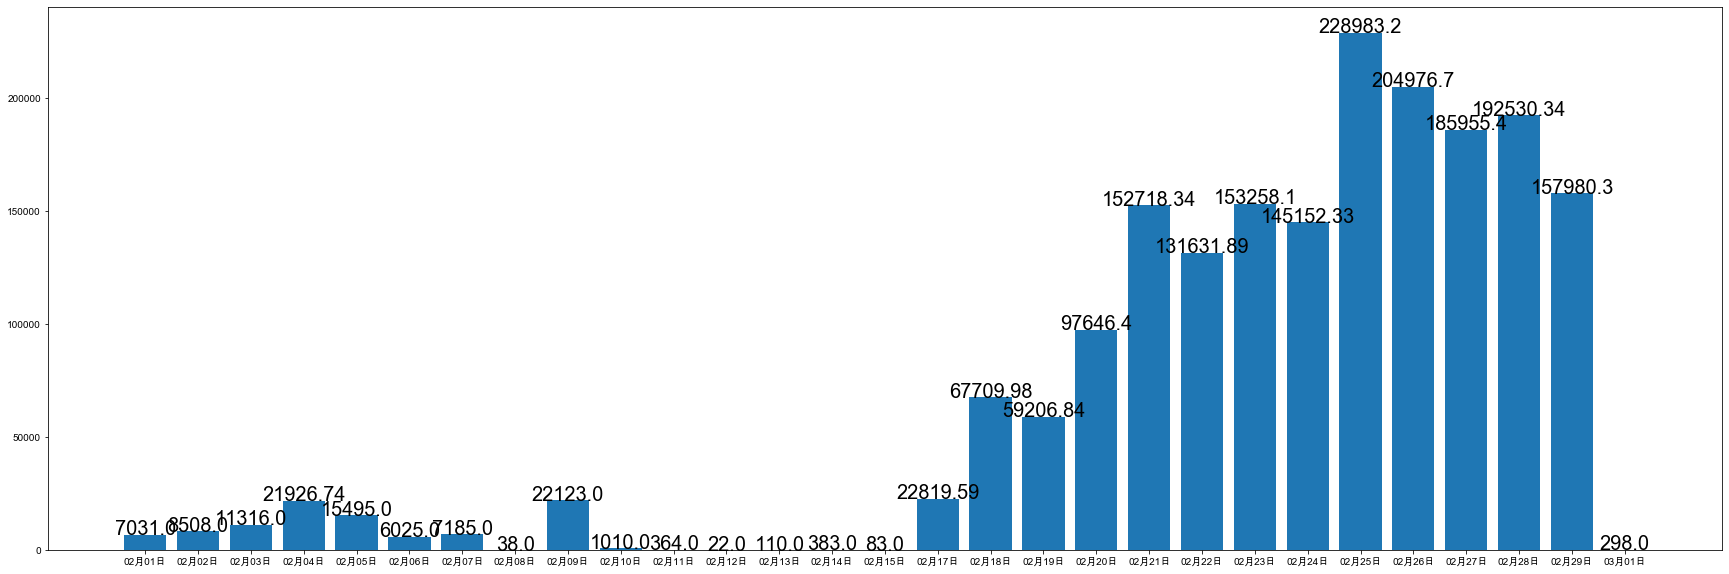

In [28]:
fig=plt.figure(figsize=(30,10))
plt.bar(GMV_day.index,GMV_day['买家实际支付金额'])
for x,y in zip(GMV_day.index,GMV_day['买家实际支付金额']):
    plt.text(x,y,round(y,2),ha='center',fontsize=20)

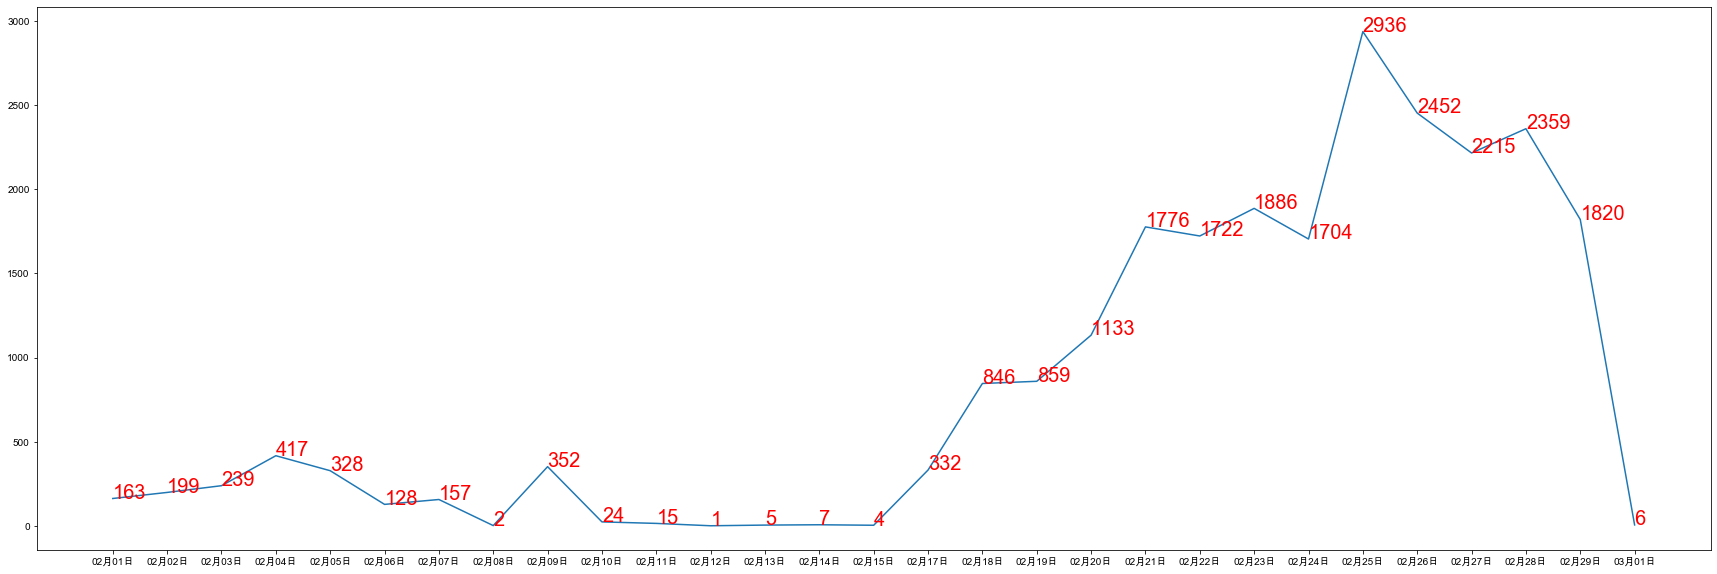

In [29]:
fig=plt.figure(figsize=(30,10))
plt.plot(order_day.index,order_day['订单编号'])
for x,y in zip(order_day.index,order_day['订单编号']):
    plt.text(x,y,y,c='r',fontsize=20)

总体销售情况：

* 2月份的总销售额为190.25万；
* 2月16日前销售额较少，在2月4日和2月9日达到小高峰；
* 2月17日开始销售额持续增长，高峰2月25日最高销售额为22.9万；
* 3月1日销售额突然变低，只有298.

问题分析：

* 2月初销量低可能是因为春节假期和疫情原因；2020年的春节假期为1月24日至2月2日，因疫情，复工复产时间推迟至不早于2月9日24时，2月10日-2月16日为复工复产准备期间。
* 3月1日销售额突降是因为数据采集问题，该日订单只记录了在2月29日创建但在3月1日支付的，并不是3月1日的所有交易数据，可以忽略。 

建议：

* 2020年初疫情突发，导致本应在2月初春节结束恢复的销售，推迟至月中。目前疫情已经常态化，应该准备多个应急方案，保证在突发事件发生时能及时举措，减少突发状况对销售的影响。

## 趋势分析

周和时间的数据处理

In [30]:
df_trend = data.copy()

In [31]:
df_trend.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,02月21日,NaN
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,02月20日,02月21日
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0,02月20日,NaN
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,02月20日,02月20日
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,02月20日,02月20日


In [32]:
df_trend['创建星期']=df_trend['订单创建时间'].dt.weekday
df_trend['创建小时']=df_trend['订单创建时间'].dt.hour
df_trend['付款星期']=df_trend['订单付款时间'].dt.weekday
df_trend['付款小时']=df_trend['订单付款时间'].dt.hour

In [33]:
data_weekday=df_trend.groupby(['创建星期']).agg(支付总金额=('买家实际支付金额','sum'))
data_weekday

,支付总金额
创建星期,
0,180080.16
1,319611.68
2,279517.04
3,291276.70
4,350732.08
5,296801.09
6,184468.40


In [34]:
data_weekday=df_trend.groupby(['创建星期','创建时间']).agg(支付总金额=('买家实际支付金额','sum'))
data_weekday

支付总金额
创建星期 创建时间             
0    02月03日   11316.00
     02月10日    1010.00
     02月17日   23303.83
     02月24日  144450.33
1    02月04日   21926.74
     02月11日     364.00
     02月18日   67310.74
     02月25日  230010.20
2    02月05日   15685.00
     02月12日      22.00
     02月19日   59366.34
     02月26日  204443.70
3    02月06日    5949.00
     02月13日     110.00
     02月20日   99022.30
     02月27日  186195.40
4    02月07日    7109.00
     02月14日     383.00
     02月21日  151429.74
     02月28日  191810.34
5    02月01日    7031.00
     02月15日      83.00
     02月22日  131932.79
     02月29日  157754.30
6    02月02日    8508.00
     02月09日   22123.00
     02月23日  153837.40

In [35]:
data_dict={}
for i in range(7):
    data_dict[i]=round(float(data_weekday.loc[i].mean()),2)

In [36]:
data_dict

{0: 45020.04,
 1: 79902.92,
 2: 69879.26,
 3: 72819.18,
 4: 87683.02,
 5: 74200.27,
 6: 61489.47}

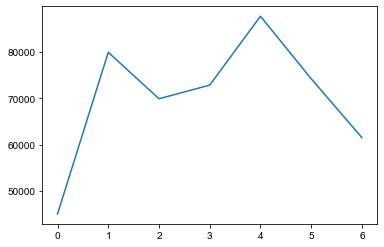

In [37]:
plt.plot(data_dict.values())
plt.show()

In [38]:
weekday={
    0:'周一',
    1:'周二',
    2:'周三',
    3:'周四',
    4:'周五',
    5:'周六',
    6:'周日'
    
}

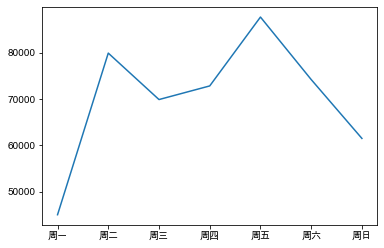

In [39]:
plt.plot([weekday[i] for i in data_dict.keys()],data_dict.values())
plt.show()

In [40]:
df_hour=df_trend.groupby(['创建小时']).agg(小时成交金额=('买家实际支付金额','sum'))
df_hour

,小时成交金额
创建小时,
0,68134.82
1,37158.36
2,22785.31
3,13758.56
4,8835.54
5,7402.88
6,15795.88
7,35417.68
8,57107.76


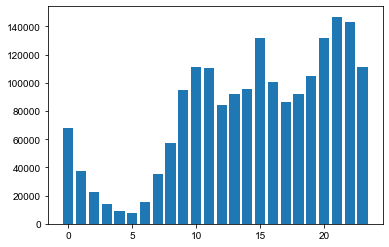

In [41]:
plt.bar(df_hour.index,df_hour['小时成交金额'])
plt.show()

趋势分析： 

* 每周销售最好的时候是周五，其次是周二，最差的是周一；
* 周末并不是预想中销售最好的时间，甚至比大部分工作日差；
* 凌晨销售量低，从6点开始销量稳定提升，中午开始趋于稳定略有波动，在10时、15时、21时分别有一个高峰，22点以后销量开始下降；
* 销量最高的时间是晚上21点。

建议：
* 促销活动可以安排在周五开始，既可以提高原本的高销量，又可以拉动周末的消费；
* 促销信息、产品推广广告的推送时间最好安排在晚上9点，此时消费人数最多，信息的曝光量最大，能带来最大收益；
* 如果有条件多次推送信息，10点、15点、21点是较好的选择。

## 消费金额分析
* 将订单总金额作为消费金额，分析消费者更容易接受什么金额区间。

(array([2.7992e+04, 9.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.60740e+03, 3.21380e+03, 4.82020e+03, 6.42660e+03,
        8.03300e+03, 9.63940e+03, 1.12458e+04, 1.28522e+04, 1.44586e+04,
        1.60650e+04]),
 <BarContainer object of 10 artists>)

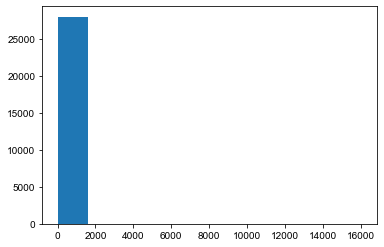

In [42]:
plt.hist(data['总金额'])

In [43]:
plt.hist?

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in each bin, then draws the distribution either as a
`.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
*weights* parameters are forwarded to `numpy.histogram`.

If the data has already been binned and counted, use `~.bar` or
`~.stairs` to plot the distribution::

    counts, bins = np.histogram(x)
    plt.stairs(counts, bins)

Alternatively, plot pre-computed bins and counts using ``hist()`` by
treating each bin as a single point with a weight equal to its count::

    plt.hist(bins[:-1], bins, weights=counts)

The data input

Text(0, 0.5, '订单数')

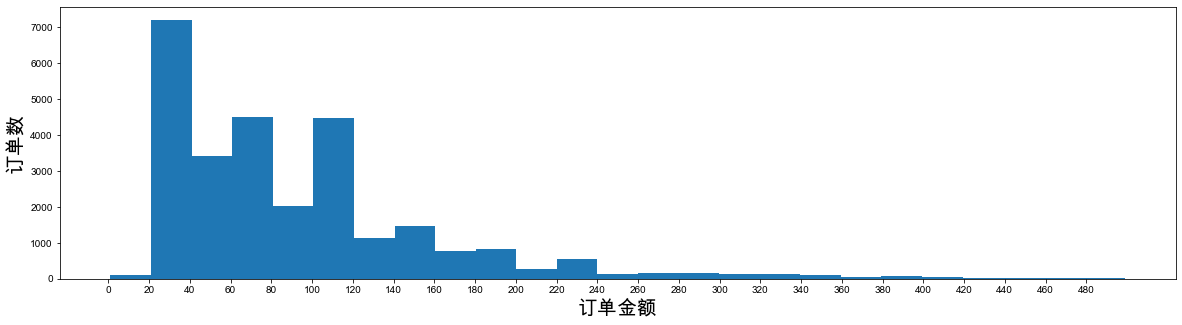

In [44]:
plt.figure(figsize=(20,5))
plt.hist(data[data['总金额']<500]['总金额'],bins=25)
plt.xticks(np.arange(0,500,step=20))
plt.xlabel('订单金额',fontsize=20)
plt.ylabel('订单数',fontsize=20)

数据分布比较离散

筛选总金额500以下：

大部分订单金额在200元以下，集中分布20-120之间


In [45]:
price_max=data['总金额'].max()
bins=[0,20,200,500,price_max]
price_label=['0-20','20-200','200-500','500以上']
price_cut=[pd.cut(data['总金额'],bins=bins,labels=price_label).value_counts()[i]
          for i in price_label]


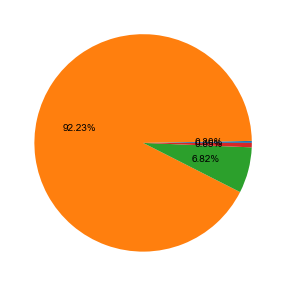

In [46]:
plt.figure(figsize=(20,5))
plt.pie(price_cut,autopct='%1.2f%%') #自动添加百分比显示，采用格式化方法显示
plt.show()

消费金额分析：

* 大部分订单金额在200元以下，集中20-120元；
* 20-40元的订单最多；
* 20元以下和200元以上的订单很少，占7.8%
* 20-200元订单总量占97.23%

建议：

产品推广以价格20-200元的产品为主，着重推广20-40元的产品，这个区间是消费者偏好的区间。

## 地区分析

In [47]:
data

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,02月21日,NaN
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,02月20日,02月21日
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0,02月20日,NaN
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,02月20日,02月20日
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,02月20日,02月20日
...,...,...,...,...,...,...,...,...,...
28005,28006,37.0,37.0,四川省,2020-02-27 00:01:00,2020-02-27 00:01:10,0.0,02月27日,02月27日
28006,28007,69.0,0.0,上海,2020-02-27 00:00:18,NaT,0.0,02月27日,NaN
28007,28008,69.0,0.0,上海,2020-02-27 00:00:17,NaT,0.0,02月27日,NaN
28008,28009,37.0,37.0,辽宁省,2020-02-27 00:00:09,2020-02-27 00:00:17,0.0,02月27日,02月27日


In [48]:
data_area=data.groupby('收货地址').sum()['买家实际支付金额'].sort_values(ascending=False).reset_index()
data_area

,收货地址,买家实际支付金额
0,上海,264039.78
1,北京,166448.48
2,江苏省,159359.18
3,广东省,147822.90
4,浙江省,141664.80
5,四川省,127648.15
6,山东省,103917.26
7,天津,89990.06
8,辽宁省,74692.05
9,重庆,71514.65


<BarContainer object of 31 artists>

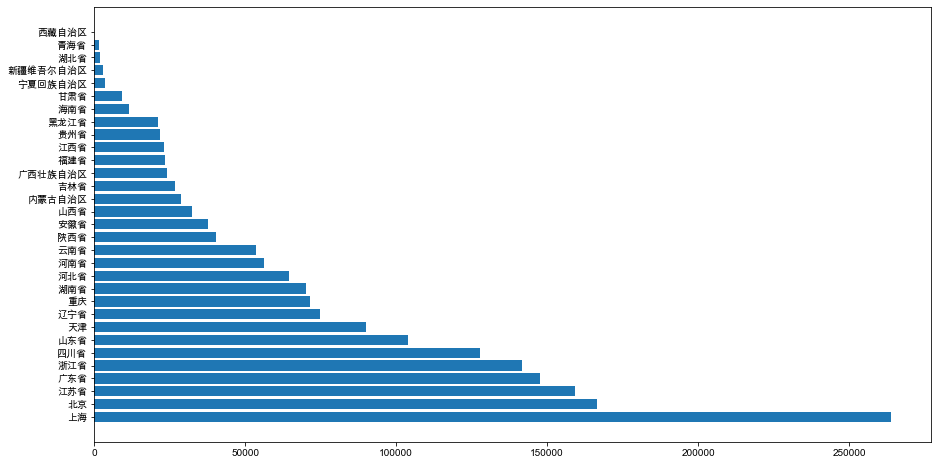

In [49]:
plt.figure(figsize=(15,8))
plt.barh('收货地址','买家实际支付金额',data=data_area)

In [50]:
data['收货地址']=data['收货地址'].str.replace('省','').str.replace('自治区','')
data['收货地址']=data['收货地址'].str.replace('壮族','').str.replace('维吾尔','').str.replace('回族','')
data['收货地址'].unique()

array(['上海', '内蒙古', '安徽', '湖南', '江苏', '浙江', '天津', '北京', '四川', '贵州', '辽宁',
       '河南', '广西', '广东', '福建', '海南', '江西', '甘肃', '河北', '黑龙江', '云南', '重庆',
       '山西', '吉林', '山东', '陕西', '湖北', '青海', '新疆', '宁夏', '西藏'], dtype=object)

地区分布

* 销售额最高的省市是上海，北京、江苏、广东、浙江；
* 销售额最少的省市为西藏、青海、湖北、新疆、宁夏， 主要为西部地区。

地区分析：

* 湖北当时疫情状态，所以销售额低；
* 从价格分布看，销量最高的产品价格集中在20-200元，尤其是20-40元。产品价格不高，而且往往对西部偏远省份不包邮，因而在考虑成本的情况下很难提升这些地区的销量，所以建议以提高西南、中部以及东北地区的销量为先，逐渐寻找发展西部地区销量的对策。

建议： 

* 保持优势省市的订单量；
* 西南、中部以及东北地区有很大的发展潜力，建议先从这些地区开始开展促销提高销量；

## 转化率分析
本项目中，用户行为路径为：创建订单 -> 订单付款 -> 订单成交 -> 订单全额成交（无退款）

In [51]:
data

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,创建时间,付款时间
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,02月21日,NaN
1,2,21.0,21.0,内蒙古,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,02月20日,02月21日
2,3,37.0,0.0,安徽,2020-02-20 23:59:35,NaT,0.0,02月20日,NaN
3,4,157.0,157.0,湖南,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,02月20日,02月20日
4,5,64.8,0.0,江苏,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,02月20日,02月20日
...,...,...,...,...,...,...,...,...,...
28005,28006,37.0,37.0,四川,2020-02-27 00:01:00,2020-02-27 00:01:10,0.0,02月27日,02月27日
28006,28007,69.0,0.0,上海,2020-02-27 00:00:18,NaT,0.0,02月27日,NaN
28007,28008,69.0,0.0,上海,2020-02-27 00:00:17,NaT,0.0,02月27日,NaN
28008,28009,37.0,37.0,辽宁,2020-02-27 00:00:09,2020-02-27 00:00:17,0.0,02月27日,02月27日


In [52]:
# 计算各个阶段的订单数
data_create=data.shape[0] #下单
data_pay=data[~data['订单付款时间'].isnull()].shape[0] #付款
data_pay_part=data[data['买家实际支付金额']>0].shape[0] #成交
data_pay_all=data[data['买家实际支付金额']==data['总金额']].shape[0]


In [53]:
data_funnel=pd.DataFrame()
data_funnel['环节']=['下单','付款','成交','全额成交']
data_funnel['订单量']=[data_create,data_pay,data_pay_part,data_pay_all]
data_funnel['总体转化率%']=np.round(data_funnel['订单量']/data_funnel['订单量'][0],3)*100
data_funnel['付款订单转化率%']=np.round(data_funnel['订单量']/data_funnel['订单量'][1],3)*100
data_funnel.loc[0,'付款订单转化率%']=np.nan
data_funnel


,环节,订单量,总体转化率%,付款订单转化率%
0,下单,28009,100.0,NaN
1,付款,24087,86.0,100.0
2,成交,18955,67.7,78.7
3,全额成交,18441,65.8,76.6


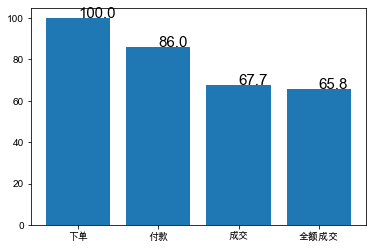

In [54]:
plt.bar(data_funnel['环节'],data_funnel['总体转化率%'])
for x,y in zip(data_funnel['环节'],data_funnel['总体转化率%']):
    plt.text(x,y,y,fontsize=15)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


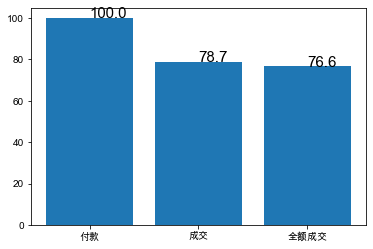

In [55]:
plt.bar(data_funnel['环节'],data_funnel['付款订单转化率%'])
for x,y in zip(data_funnel['环节'],data_funnel['付款订单转化率%']):
    plt.text(x,y,y,fontsize=15)

分析：

* 78.7%与76.6%比较接近，说明绝大部分的退款行为是部分退款。
* 付款订单里23.4%的订单存在退款行为，接近每4个订单就有一个有申请退款，其中绝大部分只退部分款项，这部分买家应该是保留了商品，但是对商品不太满意，只有很少买家对商品非常不满意或者不合适等原因全额退款；
* 前文提到90%的订单商品价格在20-175元之间，中低的价格加上23.4%的退款率，说明我们的商品虽然具有价格优势，可是质量或其他方面存在缺陷，导致退款率高。

建议：

* 23.4%的退款率说明商品存在的问题比较严重，应尽快找出问题所在（质量不达标、实物与图片不符、尺寸与标注不符、包装不好导致商品破损、快递运输过慢、发货出错、价格高于其他店铺）；

In [56]:
(data['退款金额'].sum()+data['买家实际支付金额'].sum())/data['买家实际支付金额'].sum()

1.3008356298227821

# 总结

* 2月总销售额为190.25万元。
## 为了增加销售，可以从以下几方面开展行动：

* 亟待解决的问题，找到导致高退款率的原因并解决；
* 促销活动可以安排在周五开始；
* 促销信息、产品推广广告的推送时间最好安排在晚上9点，其次是10点、15点；
* 产品推广以价格20-200元或20-175元的产品为主，尤其着重推广20-40元的产品；
* 保持优势省市的订单量，大力发展西南、中部以及东北地区的销量。

***
# <center> 练一练 
***

**1.直方图是展示数值分布的图形，在数据分析中我们往往借助直方图查看和分析数据指标的分布。 请用直方图展示收货地址为北京，且订单总金额小于500的订单金额分布。**

In [57]:
# 请写出满足以上题目要求的运行Python代码



Text(0, 0.5, '订单数')

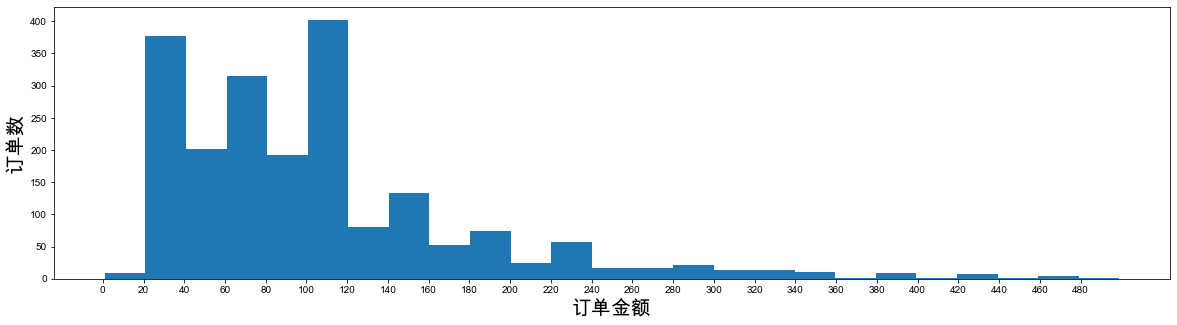

In [58]:
plt.figure(figsize=(20,5))
plt.hist(data[data['收货地址']=="北京"][data['总金额']<500]['总金额'],bins=25)
plt.xticks(np.arange(0,500,step=20))
plt.xlabel('订单金额',fontsize=20)
plt.ylabel('订单数',fontsize=20)

**2.订单量体现业务的频繁度，是销售中的重要指标。请用柱状图展示各收货地区的订单量分布。**


In [59]:
# 请写出满足以上题目要求的运行Python代码


<BarContainer object of 31 artists>

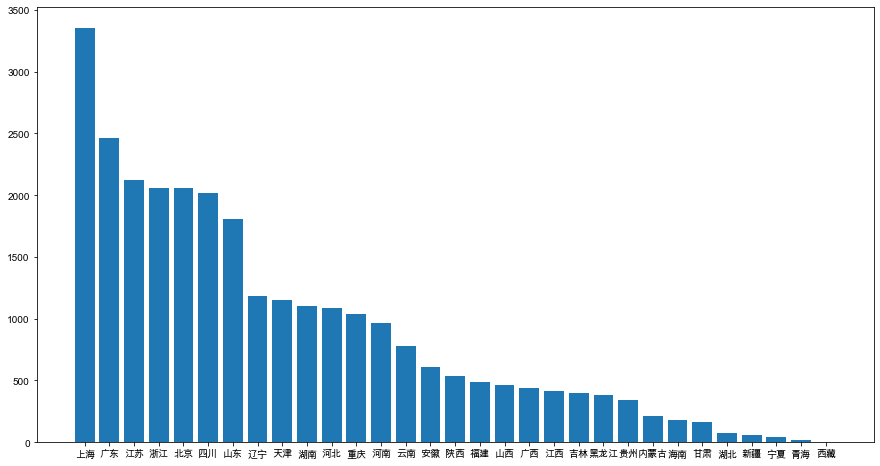

In [60]:
# 计算各地区的订单量
data_area=data.groupby('收货地址').count()['订单编号'].sort_values(ascending=False).reset_index()
data_area
data_orders = pd.DataFrame()
data_orders['收货地址']=(data_area['收货地址'])
data_orders['订单量']=(data_area['订单编号'])
#柱状图展示地区订单量分布
plt.figure(figsize=(15,8))
plt.bar('收货地址','订单量',data=data_orders)
